### Set up environment

In [1]:
### UKCP18 30 mins
# 1 month of data 200101 - January, 2001
# 48 half hours * 30 days = 1440 time slices

### NIMROD 30 mins
# 1 day of data 20010106 - 6th January, 2001
# 48 half hours = 48 time slices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 1, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors]     

labels_and_colors = [
    ('black', 'CEH-GEAR (Hourly)'),
    ('darkorange', 'UKCP18 (Hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD (30 mins)')]

### Get model data for overlapping and not overlapping time periods

In [25]:
resolution = '2.2km_bng_masked'
ukcp18_hrly_2001_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_{resolution}_GB_jja.npy')

In [18]:
resolution = '2.2km_regridded'
cehgear_1990_2014_GB_jja_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')

In [5]:
resolution = '2.2km_bng_masked'
ukcp18_30m_2001_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2019_{resolution}_jja_GB.npy')

In [6]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_2006_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')
# NIMROD_2006_2019_jja_GB_2km = NIMROD_2006_2019_jja_GB_2km[NIMROD_2006_2019_jja_GB_2km <= 100]

## Calculate CDFs and CCDFs

## All

In [30]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35]
ukcp18_hrly_2001_2019_jja_GB_2km_results_top50 = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_2km,bins_i_want)
ukcp18_30m_2001_2019_jja_GB_2km_results_top50 = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_2km, bins_i_want)
NIMROD_2006_2019_jja_GB_2km_results_top50 = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_2km,bins_i_want)
cehgear_1990_2014_GB_jja_2km_results_top50  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_2km, bins_i_want)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


In [29]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NaN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Ensure last bin includes all values >= 35 mm
    bins_i_want = np.append(bins_i_want, [np.inf])  # Add an "infinity" bin

    # Compute histogram
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(hist * np.diff(bin_edges))

    # Compute complementary cumulative distribution function (CCDF)
    ccdf = 1 - cdf

    # Find bin centers (for plotting)
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # **Manually adjust the final bin center to be 35 mm**
    bin_centres[-1] = 35  # Last bin center is now fixed at 35 mm

    return cdf, ccdf, bin_centres, bin_edges[1:]


Text(0.5, 0, 'Intensity (mm/hr))')

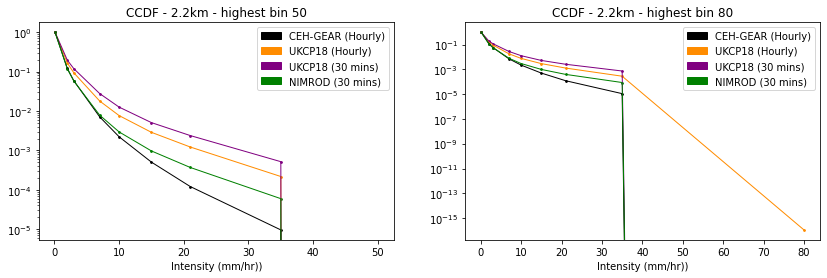

In [27]:
fig, axs = plt.subplots(figsize=(8,4))

results = [ukcp18_hrly_2001_2019_jja_GB_2km_results_top50, ukcp18_30m_2001_2019_jja_GB_2km_results_top50,
           cehgear_1990_2014_GB_jja_2km_results_top50, NIMROD_2006_2019_jja_GB_2km_results_top50]
colors = ['darkorange', 'purple',  'black',  'green']
plot_ccdf(axs,results, colors)

axs.set_yscale('log')
axs.set_title('CCDF - 2.2km - highest bin 50')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs.legend(handles=patches);
axs.set_xlabel('Intensity (mm/hr))')


Text(0.5, 0, 'Intensity (mm/hr))')

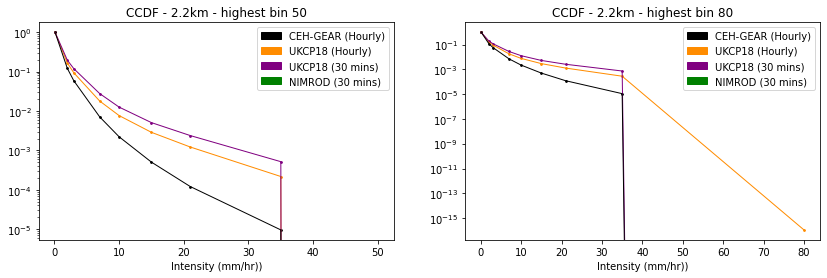

In [23]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))

results = [ukcp18_hrly_2001_2019_jja_GB_2km_results_top50, ukcp18_30m_2001_2019_jja_GB_2km_results_top50,
           cehgear_1990_2014_GB_jja_2km_results_top50]
colors = ['darkorange', 'purple', 'black', 'green']
plot_ccdf(axs[0],results, colors)

axs[0].set_yscale('log')
axs[0].set_title('CCDF - 2.2km - highest bin 50')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs[0].legend(handles=patches);
axs[0].set_xlabel('Intensity (mm/hr))')

results = [ukcp18_hrly_2001_2019_jja_GB_2km_results_top80, ukcp18_30m_2001_2019_jja_GB_2km_results_top80,
           cehgear_1990_2014_GB_jja_2km_results_top80]
plot_ccdf(axs[1],results, colors)
axs[1].set_yscale('log')
axs[1].set_title('CCDF - 2.2km - highest bin 80')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs[1].legend(handles=patches);
axs[1].set_xlabel('Intensity (mm/hr))')